# Imports

In [297]:
import yfinance as yf
import datetime
import pandas as pd
import requests
import matplotlib.pyplot as plt

# Variables

In [298]:
# Define the start and end dates
start_date = datetime.datetime.now() - datetime.timedelta(days=3*365)
end_date = datetime.datetime.now()
components_url = 'https://www.slickcharts.com/sp500'
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

# Func: Get Ticker Data

In [299]:
def get_ticker_data(ticker, start_date, end_date):
    data = yf.Ticker(ticker).history(start=start_date, end=end_date)
    data['Ticker'] = ticker
    return data

In [300]:
get_ticker_data('^GSPC', start_date, end_date).sample()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2022-03-18 00:00:00-04:00,4407.339844,4465.399902,4390.569824,4463.120117,8278430000,0.0,0.0,^GSPC


# Func: Get S&P Components

In [301]:
components_r = requests.get(components_url, headers=header)

In [302]:
sp500_components = pd.read_html(components_r.text)[0]

In [303]:
# Replace '.' with '-' in the 'Symbol' column
sp500_components['Symbol'] = sp500_components['Symbol'].str.replace('.', '-', regex=False)

In [304]:
sp500_components.sample(5)

,#,Company,Symbol,Weight,Price,Chg,% Chg
80,82,Marsh & Mclennan Cos,MMC,0.261805,198.08,0.35,(0.17%)
296,298,Take Two Interactive Softwre,TTWO,0.060187,143.96,2.63,(1.86%)
25,26,Walmart Inc,WMT,0.625175,163.40,-0.03,(-0.02%)
399,401,Conagra Brands Inc,CAG,0.036521,28.63,-0.10,(-0.33%)
122,124,Kla Corp,KLAC,0.167296,456.75,0.24,(0.05%)


In [305]:
sp20_components_raw = sp500_components.head(20)['Symbol'].tolist()
# Replace '.' with '-' using a list comprehension
sp20_components_list = [item.replace('.', '-') for item in sp20_components_raw]

# Get S&P 500/20 Data, 5 Year Return, Annual Return

## S&P 500

In [306]:
sp500_data = get_ticker_data('^GSPC', start_date, end_date)

In [307]:
sp500_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2020-09-21 00:00:00-04:00,3285.570068,3285.570068,3229.100098,3281.060059,4836070000,0.0,0.0,^GSPC
2020-09-22 00:00:00-04:00,3295.750000,3320.310059,3270.949951,3315.570068,3974510000,0.0,0.0,^GSPC
2020-09-23 00:00:00-04:00,3320.110107,3323.350098,3232.570068,3236.919922,4378650000,0.0,0.0,^GSPC
2020-09-24 00:00:00-04:00,3226.139893,3278.699951,3209.449951,3246.590088,4601920000,0.0,0.0,^GSPC
2020-09-25 00:00:00-04:00,3236.659912,3306.879883,3228.439941,3298.459961,3803330000,0.0,0.0,^GSPC


In [308]:
# Calculate daily returns
sp500_returns = (sp500_data['Close'] / sp500_data['Close'].shift(1)) - 1

In [309]:
sp500_returns.head()

Date
2020-09-21 00:00:00-04:00         NaN
2020-09-22 00:00:00-04:00    0.010518
2020-09-23 00:00:00-04:00   -0.023721
2020-09-24 00:00:00-04:00    0.002987
2020-09-25 00:00:00-04:00    0.015977
Name: Close, dtype: float64

In [310]:
sp500_returns.sample()

Date
2022-06-21 00:00:00-04:00    0.024477
Name: Close, dtype: float64

In [311]:
# Calculate cumulative daily returns
sp500daily_returns = (1 + sp500_returns).cumprod()

<AxesSubplot:xlabel='Date'>

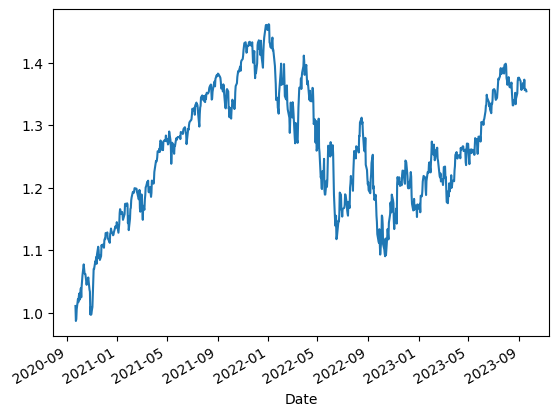

In [312]:
sp500daily_returns.plot()

In [313]:
# Calculate total return over the period
sp500total_return = sp500daily_returns[-1] - 1

In [314]:
sp500total_return*100

35.44251296689649

In [315]:
# Calculate annualized return
days_in_period = (end_date - start_date).days
years_in_period = days_in_period / 365
annualized_return = (1 + sp500total_return) ** (1 / years_in_period) - 1

In [316]:
annualized_return*100

10.641571160244423

## S&P 20 Equal Weighted

### Method 1

In [317]:
sp20_data = pd.concat([get_ticker_data(component, start_date, end_date) for component in sp20_components_list])

In [318]:
sp20_data.sample(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2023-06-30 00:00:00-04:00,106.447406,107.002850,105.941551,106.377975,13542700,0.0,0.0,XOM
2021-03-17 00:00:00-04:00,103.801498,105.488998,102.699997,104.554001,25980000,0.0,0.0,GOOG
2021-02-16 00:00:00-05:00,133.748477,135.397626,132.676990,134.773361,12130600,0.0,0.0,JPM
2022-02-28 00:00:00-05:00,133.284500,135.640503,132.825256,134.891006,29676000,0.0,0.0,GOOG
2022-07-13 00:00:00-04:00,317.528784,320.161610,316.365183,317.972504,2564200,0.0,0.0,LLY


In [319]:
# Calculate daily returns for individual stocks
sp20_data['Daily Return'] = sp20_data.groupby('Ticker')['Close'].pct_change()

In [320]:
#sp20 portfolio daily return - Equal Weighting
sp20_returns = sp20_data.groupby('Date')['Daily Return'].mean()

In [321]:
sp20daily_returns = (1 + sp20_returns).cumprod() - 1

<AxesSubplot:xlabel='Date'>

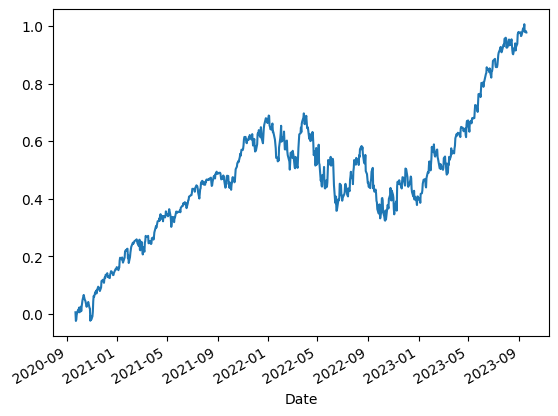

In [322]:
sp20daily_returns.plot()

In [323]:
sp20total_return = sp20daily_returns[-1]

In [324]:
sp20total_return*100

97.69751699441609

## S&P 20 Index Weighted

In [325]:
# Merge the daily returns DataFrame with the weightings DataFrame on Ticker
sp20merged_data = sp20_data.reset_index().merge(sp500_components[['Symbol', 'Weight']], left_on='Ticker', right_on='Symbol', how='left').set_index('Date')
sp20merged_data['Weighted Daily Return'] = sp20merged_data['Daily Return'] * sp20merged_data['Weight']

In [326]:
# Calculate the daily portfolio return by summing the weighted daily returns for all stocks on each day
sp20index_returns = sp20merged_data.groupby('Date')['Weighted Daily Return'].mean()

sp20indexdaily_returns = (1 + sp20index_returns).cumprod() - 1

<AxesSubplot:xlabel='Date'>

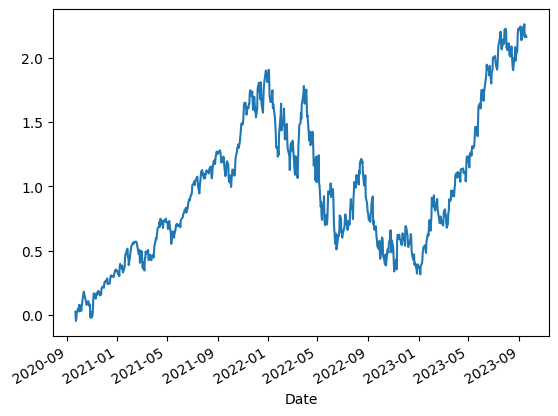

In [327]:
sp20indexdaily_returns.plot()

In [328]:
sp20indextotal_return = sp20indexdaily_returns[-1]
sp20indextotal_return*100

216.41446430162685

In [329]:
# Find the unique tickers/symbols that did not match
#sp20merged_data[sp20merged_data['Symbol'].isnull()]['Ticker'].unique()

### Method 2

In [330]:
sp20_stocklevel = yf.download(sp20_components_list, start=start_date, end=end_date)

[*********************100%%**********************]  20 of 20 completed


In [331]:
sp20_stocklevel['Adj Close'].pct_change().sample()

,AAPL,AMZN,AVGO,BRK-B,CVX,GOOG,GOOGL,HD,JNJ,JPM,LLY,MA,META,MSFT,NVDA,PG,TSLA,UNH,V,XOM
Date,,,,,,,,,,,,,,,,,,,,
2023-07-31,0.003166,0.011119,-0.001267,0.006146,0.030151,0.000752,0.001056,0.007454,-0.039833,0.006692,-0.008572,0.003359,-0.021138,-0.007241,-0.000449,-0.000703,0.003716,0.00688,0.008399,0.02957


# Compare returns to SPX(S&P500)

In [332]:
sp500daily_returns

Date
2020-09-21 00:00:00-04:00         NaN
2020-09-22 00:00:00-04:00    1.010518
2020-09-23 00:00:00-04:00    0.986547
2020-09-24 00:00:00-04:00    0.989494
2020-09-25 00:00:00-04:00    1.005303
                               ...   
2023-09-13 00:00:00-04:00    1.361584
2023-09-14 00:00:00-04:00    1.373062
2023-09-15 00:00:00-04:00    1.356366
2023-09-18 00:00:00-04:00    1.357345
2023-09-19 00:00:00-04:00    1.354425
Name: Close, Length: 754, dtype: float64

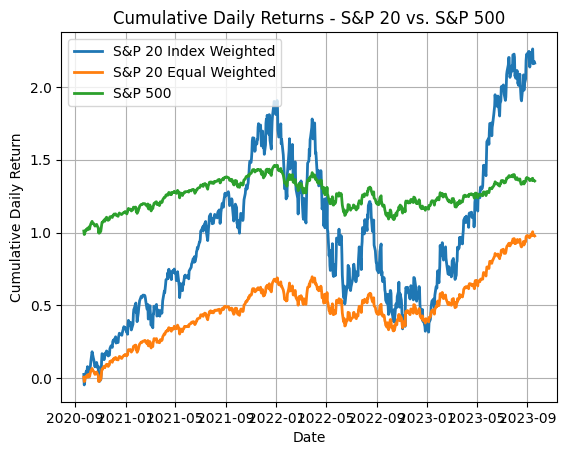

In [333]:
# Plot the cumulative daily return for the group of stocks
plt.plot(sp20indexdaily_returns.index, sp20indexdaily_returns, label='S&P 20 Index Weighted', linewidth=2)
plt.plot(sp20daily_returns.index, sp20daily_returns, label='S&P 20 Equal Weighted', linewidth=2)
# Assuming you have calculated cumulative_daily_return_sp500 for the S&P 500
plt.plot(sp500daily_returns.index, sp500daily_returns, label='S&P 500', linewidth=2)
# Plot the S&P 500 close prices on the same chart
plt.xlabel('Date')
plt.ylabel('Cumulative Daily Return')
plt.title('Cumulative Daily Returns - S&P 20 vs. S&P 500')
plt.legend()
plt.grid(True)

In [334]:
# it would take the same amount of time to break even in the volatile index weighted

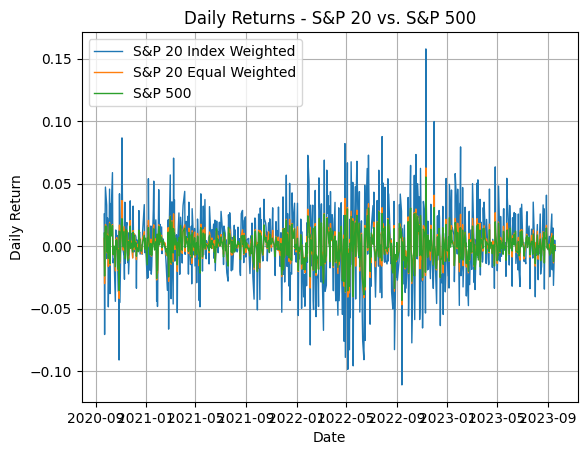

In [335]:
# FIND BETTER WAY TO SHOW THIS
plt.plot(sp20index_returns.index, sp20index_returns, label='S&P 20 Index Weighted', linewidth=1)
plt.plot(sp20_returns.index, sp20_returns, label='S&P 20 Equal Weighted', linewidth=1)
plt.plot(sp500_returns.index, sp500_returns, label='S&P 500', linewidth=1)
# Plot the S&P 500 close prices on the same chart
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Daily Returns - S&P 20 vs. S&P 500')
plt.legend()
plt.grid(True)

In [336]:
sp20daily_returns.corr(sp500daily_returns)

0.7589380749056279

In [337]:
sp20indexdaily_returns.corr(sp500daily_returns)
# strongly correlated to safe to say it will follow the market 

0.8816124178382791

In [338]:
# get total return which is sum of the daily return column

In [339]:
sp500_returns.sum()*100

35.153598183230116

In [340]:
sp20_returns.sum()*100

74.0944930747317

In [341]:
sp20index_returns.sum()*100

149.83144185014947

In [342]:
sp20indexweighted = sp20merged_data.reset_index()[['Symbol', 'Weight']].drop_duplicates(subset=['Symbol'])

In [343]:
sp20indexweighted['Weight'].sum()

40.984987000000004